In [1]:
import pandas as pd

import numpy as np
from scipy.stats import norm
from statistics import mean

import matplotlib.pyplot as plt

# 1-D Monte Carlo hopping

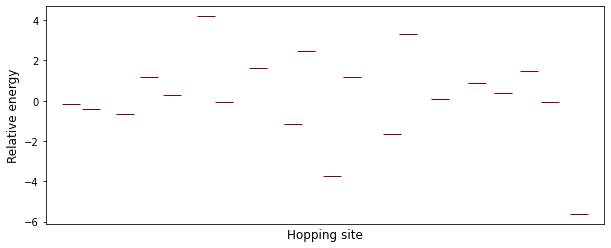

In [28]:
size = 20

# Gaussian disorder of hopping site position and energy levels
position = [i+norm.rvs(scale=0.2, size=1)[0] for i in range(size)]
energy = norm.rvs(scale=2, size=20)

plt.figure(figsize=(10,4)).set_facecolor('white')
plt.plot(position, energy, '_', ms=18, color='darkred')
plt.xticks([])
plt.xlabel('Hopping site', fontsize=12)
plt.ylabel('Relative energy', fontsize=12)
plt.savefig('1D_hopping_picture.png')
plt.show()

In my model I am considering fixed lattice sites with varied energy levels. The variation of these hopping site positions and energy levels is defined by a Gaussian (normal) distribution.

The functions below assume that the electron which is initialized in the first hopping site will always move forward - it only drifts throughout the device and there is no random-walk movement. 

In [30]:
def initialize_1d(Xvar, Evar, size):
    position = [i+norm.rvs(scale=Xvar, size=1)[0] for i in range(size)]
    energy = norm.rvs(scale=Evar, size=size)
    return [[position[i], energy[i]] for i in range(size)]

def hop_prob_turns(Z, site, E):
    if Z[site][1]+E > Z[site+1][1]:
        return 1*np.round(1/np.exp(-(Z[site+1][0]-Z[site][1])), decimals=0)
    else:
        return np.round(1/np.exp(-(Z[site+1][1]-Z[site][1]-E)), decimals=0)*np.round(1/np.exp(-(Z[site+1][0]-Z[site][1])), decimals=0)

def transit_time(Xvar, Evar, size, E):    
    Z = initialize_1d(Xvar, Evar, size)
    time = 0
    x = 0
    while x < size-1:
        time += hop_prob_turns(Z, x, E)
        x += 1
    return time

In [57]:
E = np.arange(0,2,0.05)
transits = [mean([transit_time(0.2, 1, 50, i) for runs in range(100)]) for i in E]

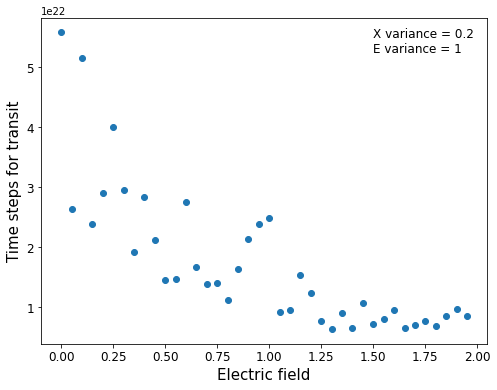

In [60]:
plt.figure(figsize=(8,6))
plt.plot(E, transits, 'o')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Electric field', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.text(1.5, 5.5*10**22, 'X variance = 0.2', fontsize=12)
plt.text(1.5, 5.25*10**22, 'E variance = 1', fontsize=12)
plt.show()

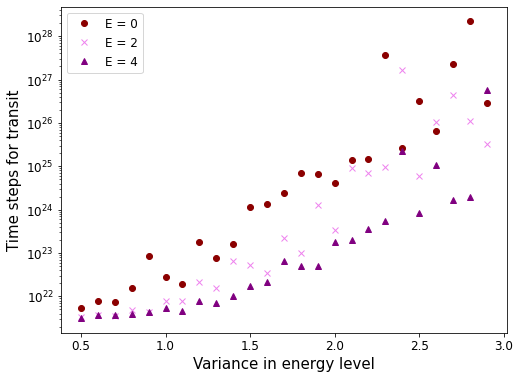

In [62]:
Evariance = np.arange(0.5,3,0.1)
plt.figure(figsize=(8,6)).set_facecolor('white')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 0) for runs in range(100)]) for i in Evariance], 
         'o', color='darkred', label='E = 0')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 2) for runs in range(100)]) for i in Evariance], 
         'x', color='violet', label='E = 2')
plt.plot(Evariance, [mean([transit_time(0.2, i, 50, 4) for runs in range(100)]) for i in Evariance], 
         '^', color='purple', label='E = 4')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Variance in energy level', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('1D_Evar.png')
plt.show()

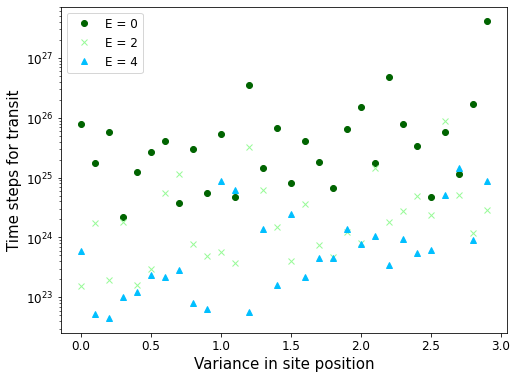

In [32]:
Xvariance = np.arange(0,3,0.1)
plt.figure(figsize=(8,6)).set_facecolor('white')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 0) for runs in range(100)]) for i in Xvariance], 
         'o', color='darkgreen', label='E = 0')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 2) for runs in range(100)]) for i in Xvariance], 
         'x', color='palegreen', label='E = 2')
plt.plot(Xvariance, [mean([transit_time(i, 2, 50, 4) for runs in range(100)]) for i in Xvariance], 
         '^', color='deepskyblue', label='E = 4')
plt.ylabel('Time steps for transit', fontsize=15)
plt.xlabel('Variance in site position', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('1D_Xvar.png')
plt.show()

# 2-D Monte Carlo hopping

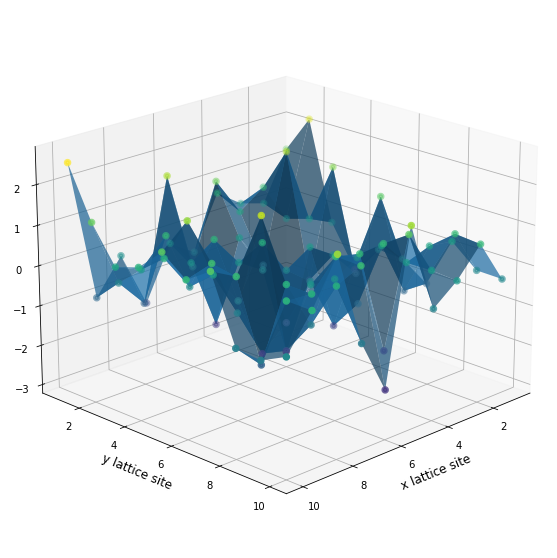

In [24]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x, y = np.arange(1,11), np.arange(1,11)
X, Y = np.meshgrid(x, y)
Z = norm.rvs(size=100).reshape(10,10)
ax.plot_surface(X, Y, Z, alpha=0.7)
ax.scatter(X, Y, Z, c=Z, linewidth=3.0)
plt.xlabel('x lattice site', fontsize=12)
plt.ylabel('y lattice site', fontsize=12)
ax.view_init(20,45)
plt.savefig('2D_grid.png')
plt.show()

In [17]:
def initialize(posVar, Evar, size):
    x = [a+norm.rvs(scale=posVar, size=1)[0] for a in range(size)]
    y = [b+norm.rvs(scale=posVar, size=1)[0] for b in range(size)]
    pos_X, pos_Y = np.meshgrid(x, y)
    energy = norm.rvs(scale=Evar, size=size**2).reshape(size, size)
    grid = [[pos_X[s], pos_Y[s]] for s in range(size)]
    return pos_X, pos_Y, energy

## to be continued...